In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
from os.path import join as path_join

def display_md(content: str):
    display(Markdown(content))

In [2]:
def get_most_recent_csv(directory: str) -> str:
    file_paths = []
    for file_name in os.listdir(directory):
        if file_name.lower().endswith(".csv"):
            file_paths.append(os.path.join(directory, file_name))
    return max(file_paths, key=os.path.getctime)

In [3]:
base_path = path_join("D:\\", "projects", "coderdojo", "my-algo-battle", "training", "snek1d", "models")
progress_file = get_most_recent_csv(base_path)

# progress_file_name = "snek1d_2019-04-22_19-24-08.csv"
# progress_file = path_join(base_path, progress_file_name)

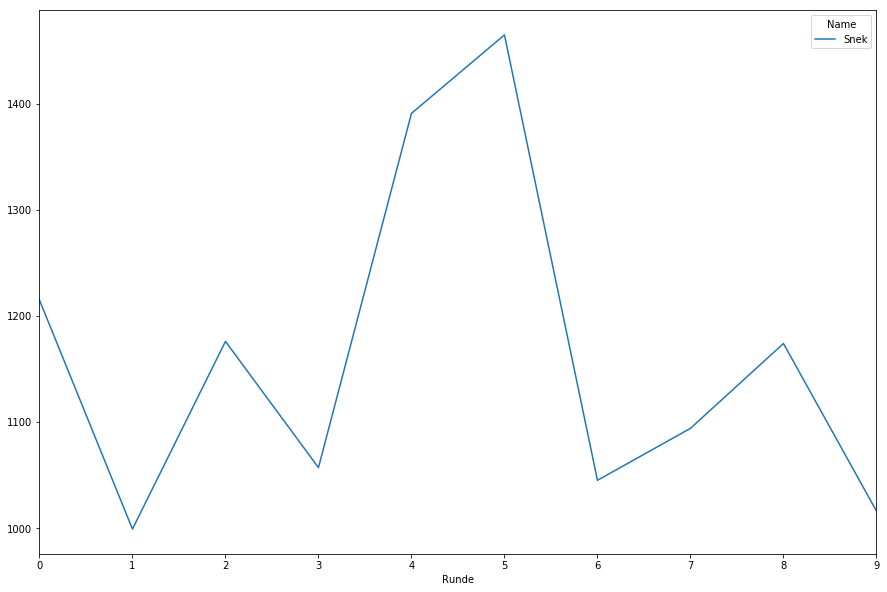

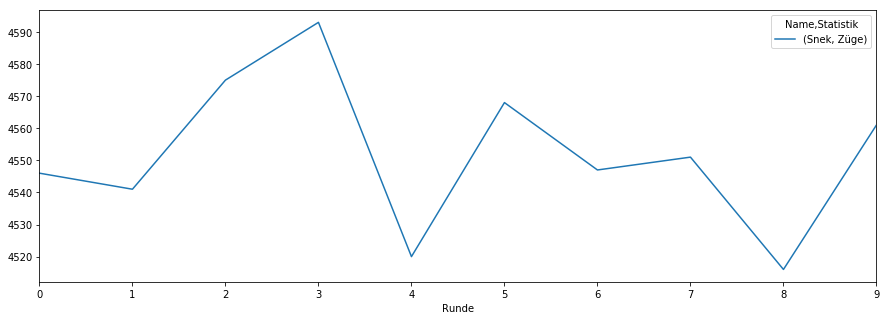

Name,Snek
Runde,
0,1215
1,999
2,1176
3,1057
4,1391
5,1465
6,1045
7,1094
8,1174


In [4]:
data = pd.read_csv(progress_file, header=[0, 1, 2], index_col=0)
data.columns = data.columns.droplevel("Nummer")
number_of_turns = data[[("Snek", "Züge")]]

columns_to_keep = []
for c in data.columns:
    if c[1] not in ["Siege", "Züge"] and not c[0].startswith("Dot"):
        columns_to_keep.append(c)
data = data[columns_to_keep]
data.columns = data.columns.droplevel("Statistik")

data.plot(figsize=(15, 10))
plt.show()

number_of_turns.plot(figsize=(15, 5))
plt.show()

display(data)